In [152]:
                                            #---- Data warehousing ----#
#                                                 ----------------
#-----
import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

                                         #---- Machine learning ----#

# Algorithm #1
from sklearn.linear_model import LinearRegression 
# Algorithm #2
from sklearn.linear_model import Ridge
# Algorithm #3
from sklearn.linear_model import Lasso
# Algorithm #4
from sklearn.ensemble import RandomForestRegressor  
# Algorithm #5
from sklearn.ensemble import GradientBoostingRegressor 
# Algorithm #6
import xgboost as xgb 

# -----------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')                 
# draw matplotlib graphs inline 
%matplotlib inline
sns.set_style("whitegrid") # configuration for seaborn library

# Data preprocessing🧹

In [153]:
orders = pd.read_excel('../Data/ex_retail2_cleaned_data.xlsx', index_col=False )

In [154]:
orders.head()

,Unnamed: 0.1,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,0,0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [155]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037173 entries, 0 to 1037172
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Unnamed: 0.1  1037173 non-null  int64         
 1   Unnamed: 0    1037173 non-null  int64         
 2   InvoiceNo     1037173 non-null  int64         
 3   StockCode     1037173 non-null  object        
 4   Description   1037173 non-null  object        
 5   Quantity      1037173 non-null  int64         
 6   InvoiceDate   1037173 non-null  datetime64[ns]
 7   UnitPrice     1037173 non-null  float64       
 8   CustomerID    801565 non-null   float64       
 9   Country       1037173 non-null  object        
 10  TotalPrice    1037173 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 87.0+ MB


In [156]:
orders.isnull().sum() #number of null values in the dataset

Unnamed: 0.1         0
Unnamed: 0           0
InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      235608
Country              0
TotalPrice           0
dtype: int64

In [157]:
temp = orders

In [158]:
# Convert InvoiceDate to datetime object
orders.InvoiceDate = pd.to_datetime(orders.InvoiceDate)

# Truncate the minutes part of datetime object
orders['InvoiceDate'] = orders.InvoiceDate.dt.date

In [160]:
# Confirm all cancelled orders have negative TotalPrice and Quantity
orders['TotalPrice'] = orders['UnitPrice'] * orders['Quantity']

In [162]:
orders.drop(['Unnamed: 0', 'Unnamed: 1', 'InvoiceNo', 'CustomerID', 'Country', 'Description', 'UnitPrice'],
            axis=1,inplace=True)

In [163]:
tem = orders

In [164]:
# orders = temp

In [165]:
orders.head()

,Unnamed: 0.1,StockCode,Quantity,InvoiceDate,TotalPrice
0,0,85048,12,2009-12-01,83.4
1,1,79323P,12,2009-12-01,81.0
2,2,79323W,12,2009-12-01,81.0
3,3,22041,48,2009-12-01,100.8
4,4,21232,24,2009-12-01,30.0


In [166]:
orders = orders.groupby(['InvoiceDate', 'StockCode'], as_index=False).sum()

In [167]:
# orders = orders.groupby(['InvoiceDate'], as_index=False).sum()

In [168]:
orders.head()

,InvoiceDate,StockCode,Unnamed: 0.1,Quantity,TotalPrice
0,2009-12-01,10002,41,12,10.20
1,2009-12-01,10120,2836,60,12.60
2,2009-12-01,10125,4941,5,5.10
3,2009-12-01,10133,3619,23,26.35
4,2009-12-01,11001,1950,2,6.86


In [169]:
orders.head(100)

,InvoiceDate,StockCode,Unnamed: 0.1,Quantity,TotalPrice
0,2009-12-01,10002,41,12,10.20
1,2009-12-01,10120,2836,60,12.60
2,2009-12-01,10125,4941,5,5.10
3,2009-12-01,10133,3619,23,26.35
4,2009-12-01,11001,1950,2,6.86
...,...,...,...,...,...
95,2009-12-01,20830,2921,3,6.30
96,2009-12-01,20831,2923,3,6.30
97,2009-12-01,20832,1822,1,1.70
98,2009-12-01,20863,1823,1,4.30


In [170]:
orders.InvoiceDate = pd.to_datetime(orders.InvoiceDate)#

In [171]:
t = orders

In [172]:
# -- IMPORTANT --
orders['Year'] = orders.InvoiceDate.dt.year
orders['Quarter'] = orders.InvoiceDate.dt.quarter
orders['Month'] = orders.InvoiceDate.dt.month
orders['Week'] = orders.InvoiceDate.dt.week
orders['Weekday'] = orders.InvoiceDate.dt.weekday
orders['Day'] = orders.InvoiceDate.dt.day
orders['Dayofyear'] = orders.InvoiceDate.dt.dayofyear
orders['UnitPrice'] = orders.TotalPrice/orders.Quantity

In [173]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530447 entries, 0 to 530446
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceDate   530447 non-null  datetime64[ns]
 1   StockCode     530447 non-null  object        
 2   Unnamed: 0.1  530447 non-null  int64         
 3   Quantity      530447 non-null  int64         
 4   TotalPrice    530447 non-null  float64       
 5   Year          530447 non-null  int64         
 6   Quarter       530447 non-null  int64         
 7   Month         530447 non-null  int64         
 8   Week          530447 non-null  int64         
 9   Weekday       530447 non-null  int64         
 10  Day           530447 non-null  int64         
 11  Dayofyear     530447 non-null  int64         
 12  UnitPrice     530447 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(9), object(1)
memory usage: 52.6+ MB


In [178]:
orders.describe()
# Note: some outliers in the TotalPrice and Quantity are presented below
# SEE Quantity (max) and TotalPrice (max)

,Quantity,TotalPrice,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,UnitPrice
count,530447.000000,530447.000000,530447.000000,530447.000000,530447.000000,530447.000000,530447.000000,530447.00000,530447.000000,530447.000000
mean,19.586815,34.436133,2010.439303,2.679548,7.067911,28.619148,2.517865,15.32725,199.125375,3.495316
std,64.059863,71.381389,0.573044,1.145581,3.504972,15.205946,1.897490,8.62127,106.153333,8.090734
min,1.000000,0.001000,2009.000000,1.000000,1.000000,1.000000,0.000000,1.00000,4.000000,0.001000
25%,2.000000,5.800000,2010.000000,2.000000,4.000000,15.000000,1.000000,8.00000,106.000000,1.250000
50%,6.000000,15.000000,2010.000000,3.000000,7.000000,30.000000,2.000000,15.00000,208.000000,2.100000
75%,18.000000,32.750000,2011.000000,4.000000,10.000000,43.000000,4.000000,23.00000,297.000000,4.130000
max,7128.000000,3996.760000,2011.000000,4.000000,12.000000,52.000000,6.000000,31.00000,357.000000,604.120000


In [179]:
# Drop rows with negative Quantity
orders = orders.drop(orders[orders.Quantity<=0].index).reset_index(drop=True)
orders = orders.drop(orders[orders.TotalPrice<=0].index).reset_index(drop=True)

# Removing outliers in Quantity and TotalPrice
orders = orders[(np.abs(stats.zscore(orders.Quantity)) < 3)]
orders = orders[(np.abs(stats.zscore(orders.TotalPrice)) < 3)]

In [180]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515720 entries, 0 to 530446
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceDate  515720 non-null  datetime64[ns]
 1   StockCode    515720 non-null  object        
 2   Quantity     515720 non-null  int64         
 3   TotalPrice   515720 non-null  float64       
 4   Year         515720 non-null  int64         
 5   Quarter      515720 non-null  int64         
 6   Month        515720 non-null  int64         
 7   Week         515720 non-null  int64         
 8   Weekday      515720 non-null  int64         
 9   Day          515720 non-null  int64         
 10  Dayofyear    515720 non-null  int64         
 11  UnitPrice    515720 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(8), object(1)
memory usage: 51.2+ MB


In [181]:
orders.describe()

,Quantity,TotalPrice,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,UnitPrice
count,515720.000000,515720.000000,515720.000000,515720.000000,515720.000000,515720.000000,515720.000000,515720.000000,515720.000000,515720.000000
mean,14.311580,25.566179,2010.440148,2.674352,7.050419,28.543382,2.527317,15.338787,198.604000,3.327203
std,22.386213,32.923020,0.573039,1.145600,3.503978,15.203342,1.903652,8.622299,106.138109,4.698653
min,1.000000,0.001000,2009.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,0.001000
25%,2.000000,5.100000,2010.000000,2.000000,4.000000,15.000000,1.000000,8.000000,105.000000,1.250000
50%,6.000000,14.850000,2010.000000,3.000000,7.000000,30.000000,2.000000,15.000000,207.000000,2.100000
75%,16.000000,30.000000,2011.000000,4.000000,10.000000,42.000000,4.000000,23.000000,297.000000,4.130000
max,211.000000,211.320000,2011.000000,4.000000,12.000000,52.000000,6.000000,31.000000,357.000000,208.920000


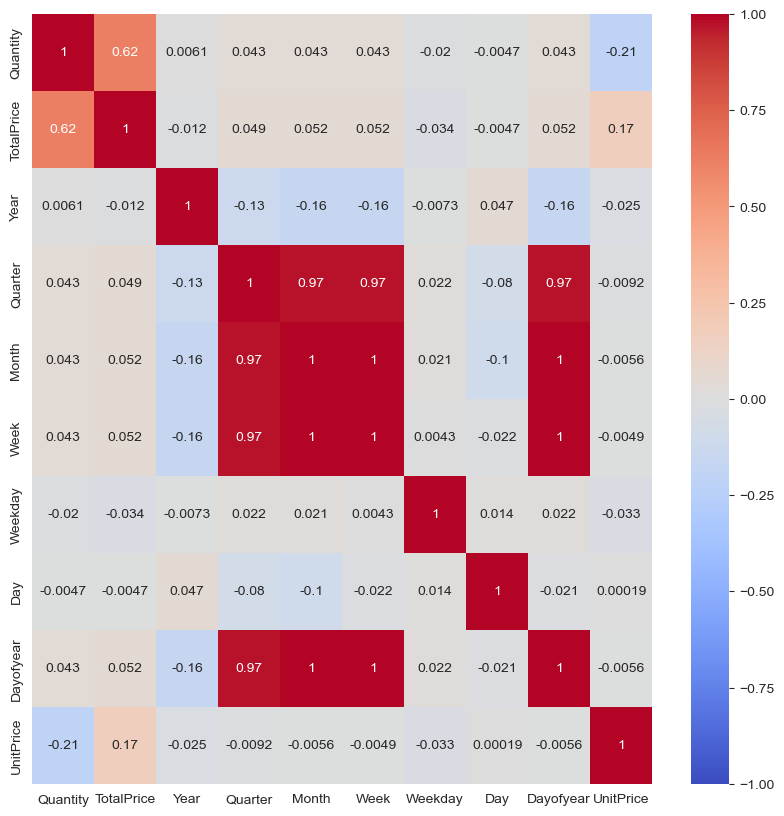

In [182]:
corrmat = orders.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10, 10))
g = sns.heatmap(orders[top_corr_features].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)

In [183]:
orders.drop(['Month', 'Quarter','Dayofyear','Year'], axis=1,inplace=True) 
# Month, Quarter, Dayofyear, Week are correlated with each other. So, we kept Week
# Year: Is not correlated to the Quantity. So, drop it 

In [184]:
orders.head()

,InvoiceDate,StockCode,Quantity,TotalPrice,Week,Weekday,Day,UnitPrice
0,2009-12-01,10002,12,10.20,49,1,1,0.850000
1,2009-12-01,10120,60,12.60,49,1,1,0.210000
2,2009-12-01,10125,5,5.10,49,1,1,1.020000
3,2009-12-01,10133,23,26.35,49,1,1,1.145652
4,2009-12-01,11001,2,6.86,49,1,1,3.430000


In [189]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515720 entries, 0 to 530446
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceDate  515720 non-null  datetime64[ns]
 1   StockCode    515720 non-null  object        
 2   Quantity     515720 non-null  int64         
 3   TotalPrice   515720 non-null  float64       
 4   Week         515720 non-null  int64         
 5   Weekday      515720 non-null  int64         
 6   Day          515720 non-null  int64         
 7   UnitPrice    515720 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 35.4+ MB


In [186]:
orders.to_excel('ex_retail2_forecasting_data_v3.xlsx')

# Machine learning algorithms 🤖

## Train and Test data preperation

In [190]:
orders = pd.read_excel('ex_retail2_forecasting_data_v3.xlsx', index_col=False)

In [199]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515720 entries, 0 to 515719
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceDate  515720 non-null  datetime64[ns]
 1   StockCode    515720 non-null  object        
 2   Quantity     515720 non-null  int64         
 3   TotalPrice   515720 non-null  float64       
 4   Week         515720 non-null  int64         
 5   Weekday      515720 non-null  int64         
 6   Day          515720 non-null  int64         
 7   UnitPrice    515720 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 31.5+ MB


In [197]:
# Split the dataset into train and test dataset
df_train = orders[orders.InvoiceDate<'2011-11-01']
df_test = orders[orders.InvoiceDate>='2011-11-01']

In [200]:
df_test.head()

,InvoiceDate,StockCode,Quantity,TotalPrice,Week,Weekday,Day,UnitPrice
472181,2011-11-01,15034,60,8.40,44,1,1,0.14
472182,2011-11-01,15036,36,29.88,44,1,1,0.83
472183,2011-11-01,16008,96,11.52,44,1,1,0.12
472184,2011-11-01,16048,24,2.88,44,1,1,0.12
472185,2011-11-01,16237,30,6.30,44,1,1,0.21


In [201]:
# Define the feature and target variables

X_train = df_train.drop(labels=['InvoiceDate','StockCode','Quantity','TotalPrice'],axis=1)
y_train = df_train.Quantity

X_test = df_test.drop(labels=['InvoiceDate','StockCode','Quantity','TotalPrice'],axis=1)
y_test = df_test.Quantity

In [229]:
# Data Frame to store all the RMSE scores for various algorithms
algo_score = pd.DataFrame()
algo_score.index.name = 'Modelling Algo'
algo_score['Train RMSE'] = None
algo_score['Test RMSE'] = None
algo_score['Hyperparameters'] = None
algo_score['Training+Test Time(sec)'] = None

cv_time = []

# Dataframes for second level of predictions. Collect the predicted y values for training and test set of data
ypred_train = pd.DataFrame(index = X_train.index)
ypred_test = pd.DataFrame(index = X_test.index)
ypred_train['quantity'], ypred_test['quantity'] = y_train, y_test


In [230]:
def rmse(y_actual, y_pred):
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
    return rmse
rmse_cv = make_scorer(rmse, greater_is_better=False)

In [231]:
def plot_true_vs_pred(y_actual, y_pred):
    fig = plt.figure(figsize=(18, 16))

    pred_val = pd.DataFrame({'actual':y_actual, 'predicted':y_pred})
    pred_val['error'] = abs(pred_val.actual.round(0), pred_val.error)
    sns.swarmplot(pred_val.actual.round(0), pred_val.error)
    plt.show()

In [232]:
# Function to predict on train and test data and return the required metrics
def model_fit(model, X_train, y_train, X_test, y_test):
    ''' 
    Input:
        model = model to be applied
        X_train y_train = Training data
        X_test, y_test = Testing data
    Output:
        rmse for training and test data 
        predicted y for training and test data
    
    '''
#     model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    rmse_train = rmse(y_train, y_train_predict)
    rmse_test = rmse(y_test, y_test_predict)
    
    rmse_all = [rmse_train, rmse_test]
    y_pred_all = [y_train_predict, y_test_predict]
    
    return(rmse_all, y_pred_all)

In [233]:
def cross_val(model, X_train, y_train, cv=5):
#     y_pred = pd.Series(index=y_train.index)
    y_pred = cross_val_predict(model,X_train,y_train,cv=5) # return one with best score
    rmse_train = rmse(y_train,y_pred)
    return(rmse_train, y_pred)

## Machine learning models

#### Linear regression - LR


In [234]:
reg = LinearRegression()

param_summary = ['','']
rmse_summary = 0
y_predict_summary = 0
%time reg.fit(X_train, y_train)
%time rmse_summary, y_predict_summary = model_fit(reg, X_train, y_train, X_test, y_test)

ypred_test['LR'] = y_predict_summary[1]  
ypred_train['LR'] = y_predict_summary[0]

algo_score.loc['Linear Regression'] = rmse_summary+param_summary

CPU times: total: 46.9 ms
Wall time: 52.4 ms
CPU times: total: 0 ns
Wall time: 14 ms


In [235]:
algo_score.loc['Linear Regression', 'Training+Test Time(sec)'] = 0.0664
cv_time.append(0.0664)
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,21.785403,22.659021,,0.0664


In [236]:
# Features and the Estimated Linear Regression Coefficients
df_coeff = pd.DataFrame({'features': X_train.columns, 'Lin_Coeff': reg.coef_})

In [237]:
df_coeff

,features,Lin_Coeff
0,Week,0.064276
1,Weekday,-0.307444
2,Day,-0.002023
3,UnitPrice,-0.973563


### Regularization Model - Ridge


In [238]:

# Hyperparameter Tuning
param_grid = {'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]}
ridge = GridSearchCV(Ridge(random_state=42), param_grid, cv=5, scoring=rmse_cv)
%time ridge.fit(X_train, y_train)
print('Best alpha for Ridge Regression Model: {}'.format(ridge.best_params_))

CPU times: total: 922 ms
Wall time: 1.67 s
Best alpha for Ridge Regression Model: {'alpha': 100}


In [239]:
# Fine tune Hyperparameter for edge cases
param_grid = {'alpha': np.arange(75,150,10)}
ridge = GridSearchCV(Ridge(random_state=42), param_grid, cv=5, scoring=rmse_cv)
%time ridge.fit(X_train, y_train)
print('Best alpha for Ridge Regression Model: {}'.format(ridge.best_params_))

CPU times: total: 984 ms
Wall time: 1.31 s
Best alpha for Ridge Regression Model: {'alpha': 145}


In [240]:
param_summary = [ridge.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(ridge, X_train, y_train, X_test, y_test)

ypred_test['Ridge'] = y_predict_summary[1]  
ypred_train['Ridge'] = y_predict_summary[0]

algo_score.loc['Ridge Regression'] = rmse_summary+param_summary

CPU times: total: 0 ns
Wall time: 12.9 ms


In [241]:
algo_score.loc['Ridge Regression', 'Training+Test Time(sec)'] = 0.0129 
cv_time.append(0.0129)
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,21.785403,22.659021,,0.0664
Ridge Regression,21.785403,22.659026,{'alpha': 145},0.0129


In [242]:
# Features and the Estimated Ridge Regression Coefficients
df_coeff['Ridge_Coeff'] = ridge.best_estimator_.coef_

In [243]:
df_ridge = pd.DataFrame({'features': X_train.columns, 'Lin_Coeff': ridge.best_estimator_.coef_})

In [244]:
df_ridge

,features,Lin_Coeff
0,Week,0.064276
1,Weekday,-0.307416
2,Day,-0.002023
3,UnitPrice,-0.973550


### Regularization Model - Lasso

In [245]:
# Hyperparameter Tuning
param_grid = {'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]}
lasso = GridSearchCV(Lasso(random_state=42), param_grid, cv=5, scoring=rmse_cv)
%time lasso.fit(X_train, y_train)
print('Best alpha for Lasso Regression Model: {}'.format(lasso.best_params_))

CPU times: total: 7.19 s
Wall time: 2.04 s
Best alpha for Lasso Regression Model: {'alpha': 0.2}


In [250]:
# Fine tune Hyperparameter for edge case

param_grid = {'alpha': np.arange(.01,.25,.01)}
lasso = GridSearchCV(Lasso(random_state=42), param_grid, cv=5, scoring=rmse_cv)
%time lasso.fit(X_train, y_train)
print('Best alpha for Lasso Regression Model: {}'.format(lasso.best_params_))

CPU times: total: 15.4 s
Wall time: 4.93 s
Best alpha for Lasso Regression Model: {'alpha': 0.24000000000000002}


In [251]:
param_summary = [lasso.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(lasso, X_train, y_train, X_test, y_test)
ypred_test['Lasso'] = y_predict_summary[1]
ypred_train['Lasso'] = y_predict_summary[0]

algo_score.loc['Lasso Regression'] = rmse_summary+param_summary

CPU times: total: 0 ns
Wall time: 11.1 ms


In [253]:
algo_score.loc['Lasso Regression', 'Training+Test Time(sec)'] = 0.0111 
cv_time.append(0.0111)
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,21.785403,22.659021,,0.0664
Ridge Regression,21.785403,22.659026,{'alpha': 145},0.0129
Lasso Regression,21.785848,22.664895,{'alpha': 0.24000000000000002},0.0111


In [254]:
# Features and the Estimated Lasso Regression Coefficients
df_coeff['Lasso_Coeff'] = lasso.best_estimator_.coef_


In [256]:
df_laso = pd.DataFrame({'features': X_train.columns, 'Lin_Coeff': lasso.best_estimator_.coef_})

In [257]:
df_laso

,features,Lin_Coeff
0,Week,0.063167
1,Weekday,-0.240688
2,Day,-0.000000
3,UnitPrice,-0.962135


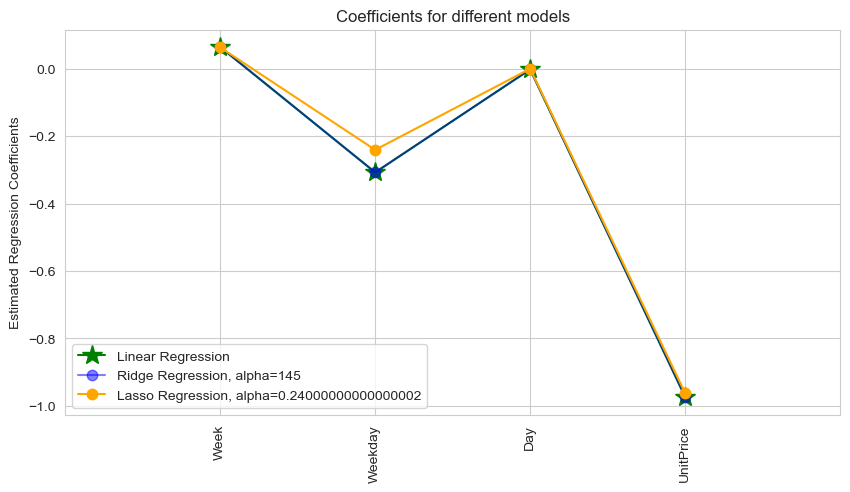

In [258]:
fig = plt.figure(figsize=(10, 5))

axes = fig.add_subplot(1, 1, 1)
axes.plot(df_coeff.Lin_Coeff, label='Linear Regression', marker='*', markersize=15, color='green')
axes.plot(df_coeff.Ridge_Coeff, label='Ridge Regression, alpha={}'.format(ridge.best_params_['alpha']), alpha=.5,marker='.', markersize=15, color='blue')
axes.plot(df_coeff.Lasso_Coeff, label='Lasso Regression, alpha={}'.format(lasso.best_params_['alpha']), marker='.', markersize=15, color='orange')

plt.xticks(range(len(df_coeff.Lin_Coeff)), df_coeff.features, rotation=90)
axes.set(ylabel='Estimated Regression Coefficients', title='Coefficients for different models')
axes.set(xlim=[-1, len(df_coeff.Lin_Coeff)])
axes.legend()


### Ensemble Model - Random Forest


In [263]:
param_distributions = {'n_estimators': [1000], 'max_features':['auto'], 'min_samples_leaf':[10],'n_jobs':[-1]}
rf_main = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions, verbose=2, n_iter = 50,cv=2, 
                             scoring=rmse_cv)
%time rf_main.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=1000, n_jobs=-1; total time=  39.9s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=1000, n_jobs=-1; total time=  34.9s
CPU times: total: 15min 2s
Wall time: 2min 36s


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50,
                   param_distributions={'max_features': ['auto'],
                                        'min_samples_leaf': [10],
                                        'n_estimators': [1000],
                                        'n_jobs': [-1]},
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=2)

In [264]:
print('Best parameters for Random Forest Regression Model: {}'.format(rf_main.best_params_))

Best parameters for Random Forest Regression Model: {'n_jobs': -1, 'n_estimators': 1000, 'min_samples_leaf': 10, 'max_features': 'auto'}


In [265]:
param_summary = [rf_main.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(rf_main, X_train, y_train, X_test, y_test)
ypred_test['RF'] = y_predict_summary[1]
ypred_train['RF'] = y_predict_summary[0]

algo_score.loc['Random Forest'] = rmse_summary+param_summary

CPU times: total: 1min 7s
Wall time: 6.54 s


In [281]:
algo_score.loc['Random Forest', 'Training+Test Time(sec)'] = 6.54
cv_time.append(6.54)
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,21.785403,22.659021,,0.0664
Ridge Regression,21.785403,22.659026,{'alpha': 145},0.0129
Lasso Regression,21.785848,22.664895,{'alpha': 0.24000000000000002},0.0111
Random Forest,15.699580,20.106121,"{'n_jobs': -1, 'n_estimators': 1000, 'min_samp...",6.54
Gradient Boost,19.107455,20.741177,"{'n_estimators': 500, 'min_samples_split': 2, ...",


In [267]:
rf_result=pd.DataFrame(rf_main.cv_results_)
rf_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_jobs,param_n_estimators,param_min_samples_leaf,param_max_features,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,34.943622,2.344723,2.578777,0.14713,-1,1000,10,auto,"{'n_jobs': -1, 'n_estimators': 1000, 'min_samp...",-18.944959,-21.061582,-20.003271,1.058311,1


In [268]:
est_score = rf_result.groupby('param_n_estimators')['mean_test_score'].mean()
est_score

param_n_estimators
1000   -20.003271
Name: mean_test_score, dtype: float64

In [ ]:
# fig=plt.figure(figsize=(18, 12))

# axes=fig.add_subplot(2, 3, 1)
# axes.plot(est_score.index, est_score.values, marker='.')
# axes.set(xlabel='n_estimators', ylabel='Mean CV Test Score', title='n_estimators vs. Score (best_n_estimator = 500)')


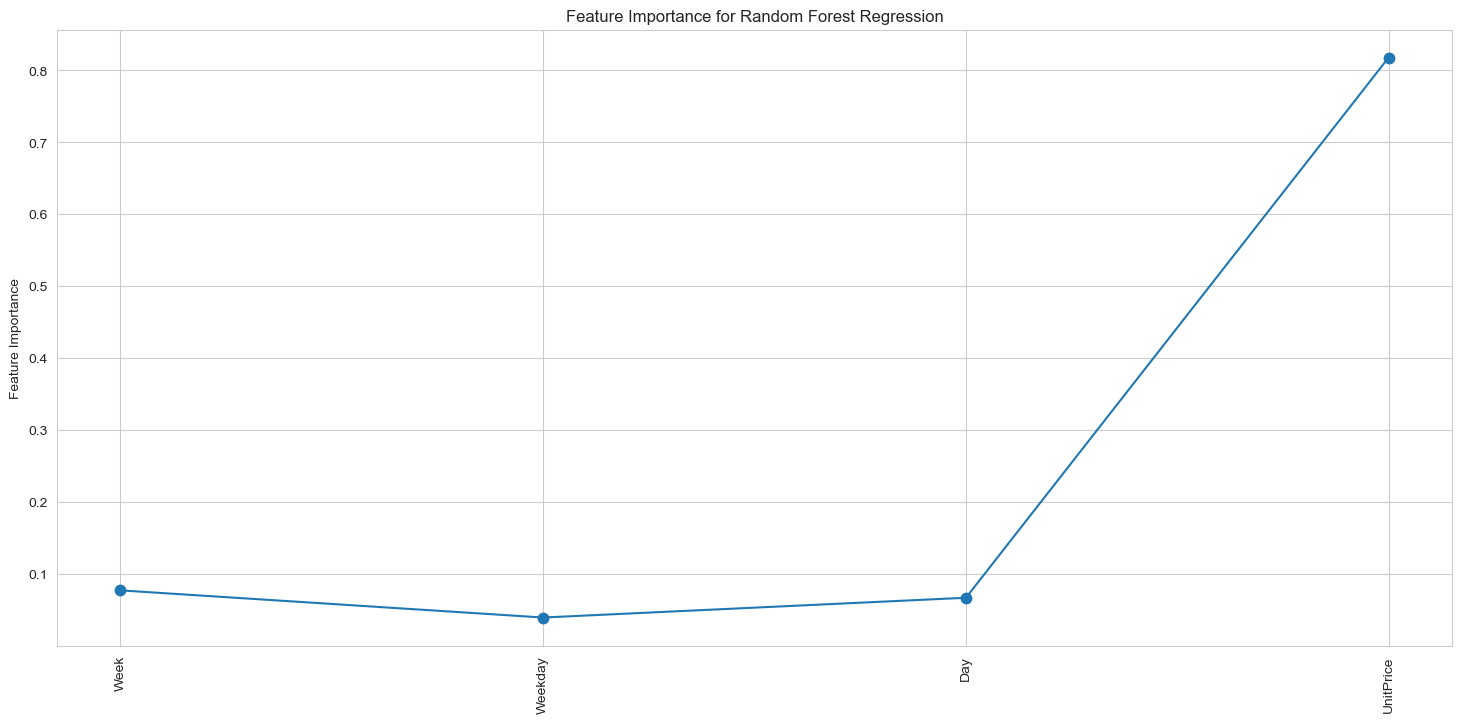

In [271]:
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(rf_main.best_estimator_.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(rf_main.best_estimator_.feature_importances_)), X_train.columns,rotation=90)
axes.set(ylabel='Feature Importance', title='Feature Importance for Random Forest Regression')

plt.show()


### Ensemble Model - Gradient Boost Regressor 

In [278]:

param_distributions = {'n_estimators': [500], 'learning_rate':[0.01],'max_features':['auto'], 'min_samples_leaf':[10], 'min_samples_split':[2]}
grad_boost = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_distributions, verbose=2, n_iter = 100,cv=2, scoring=rmse_cv)
%time grad_boost.fit(X_train, y_train)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END learning_rate=0.01, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=  50.2s
[CV] END learning_rate=0.01, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=  49.5s
CPU times: total: 2min 18s
Wall time: 3min 21s


RandomizedSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.01],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [10],
                                        'min_samples_split': [2],
                                        'n_estimators': [500]},
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=2)

In [279]:
print('Best parameters for Gradient Boost Model: {}'.format(grad_boost.best_params_))

Best parameters for Gradient Boost Model: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'auto', 'learning_rate': 0.01}


In [ ]:
# # Following code uses the best parameters generated above to fit the model

# from sklearn.ensemble import GradientBoostingRegressor

# param_distributions = {'n_estimators': [500], 'learning_rate':[0.01],'max_features':['sqrt'], 'min_samples_leaf':[10], 'max_depth':[60], 'min_samples_split':[2]}
# grad_boost = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_distributions, n_iter = 100,cv=2, scoring=rmse_cv)
# %time grad_boost.fit(X_train, y_train)

In [ ]:
# print('Best parameters for Gradient Boost Model: {}'.format(grad_boost.best_params_))

In [280]:
param_summary = [grad_boost.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(grad_boost, X_train, y_train, X_test, y_test)
ypred_test['GB'] = y_predict_summary[1]
ypred_train['GB'] = y_predict_summary[0]

algo_score.loc['Gradient Boost'] = rmse_summary+param_summary

CPU times: total: 1.39 s
Wall time: 2.57 s


In [282]:
algo_score.loc['Gradient Boost', 'Training+Test Time(sec)'] = 2.57 
cv_time.append(2.57)
algo_score
# TAKE CARE: Ensemble algorithms take more time 

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,21.785403,22.659021,,0.0664
Ridge Regression,21.785403,22.659026,{'alpha': 145},0.0129
Lasso Regression,21.785848,22.664895,{'alpha': 0.24000000000000002},0.0111
Random Forest,15.699580,20.106121,"{'n_jobs': -1, 'n_estimators': 1000, 'min_samp...",6.54
Gradient Boost,19.107455,20.741177,"{'n_estimators': 500, 'min_samples_split': 2, ...",2.57


In [ ]:
# gb_result=pd.DataFrame(grad_boost.cv_results_)
# gb_result

In [ ]:
# gb_score = gb_result.groupby('param_n_estimators')['mean_test_score'].mean()
# gb_score

In [ ]:
# fig=plt.figure(figsize=(18, 12))

# axes=fig.add_subplot(2, 3, 1)
# axes.plot(gb_score.index, gb_score.values, marker='.')
# axes.set(xlabel='n_estimators', ylabel='Mean CV Test Score', title='n_estimators vs. Score (best_n_estimator = 500)')


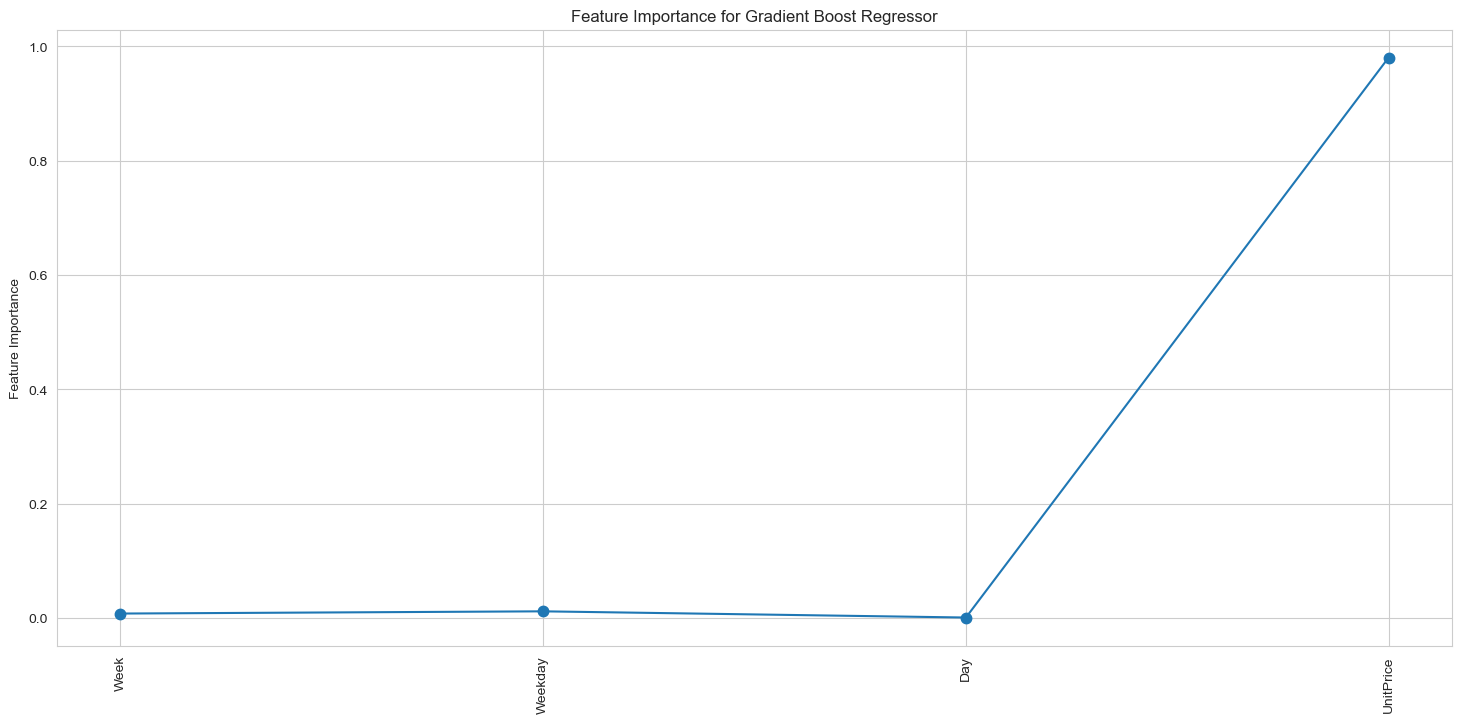

In [283]:
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(grad_boost.best_estimator_.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(grad_boost.best_estimator_.feature_importances_)), X_train.columns,rotation=90)
axes.set(ylabel='Feature Importance', title='Feature Importance for Gradient Boost Regressor')
# axes.set(xlim=[-1, len(X_train.columns)], ylim=[0, 1])

plt.show()


### XGBoost 🤯

In [342]:
xgb_model = xgb.XGBRegressor(gamma=0.4, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.4)
xgb_model.fit(X_train, y_train)
%time rmse_summary, y_predict_summary = model_fit(xgb_model, X_train, y_train, X_test, y_test)

ypred_test['XG'] = y_predict_summary[1]
ypred_train['XG'] = y_predict_summary[0]

algo_score.loc['XGBoost'] = rmse_summary+param_summary

CPU times: total: 2.05 s
Wall time: 179 ms


In [344]:
algo_score.loc['XGBoost', 'Training+Test Time(sec)'] = 0.179
cv_time.append(0.179)
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,21.785403,22.659021,,0.0664
Ridge Regression,21.785403,22.659026,{'alpha': 145},0.0129
Lasso Regression,21.785848,22.664895,{'alpha': 0.24000000000000002},0.0111
Random Forest,15.699580,20.106121,"{'n_jobs': -1, 'n_estimators': 1000, 'min_samp...",6.54
Gradient Boost,19.107455,20.741177,"{'n_estimators': 500, 'min_samples_split': 2, ...",2.57
XGBoost,17.476463,20.464415,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.179


# Summary

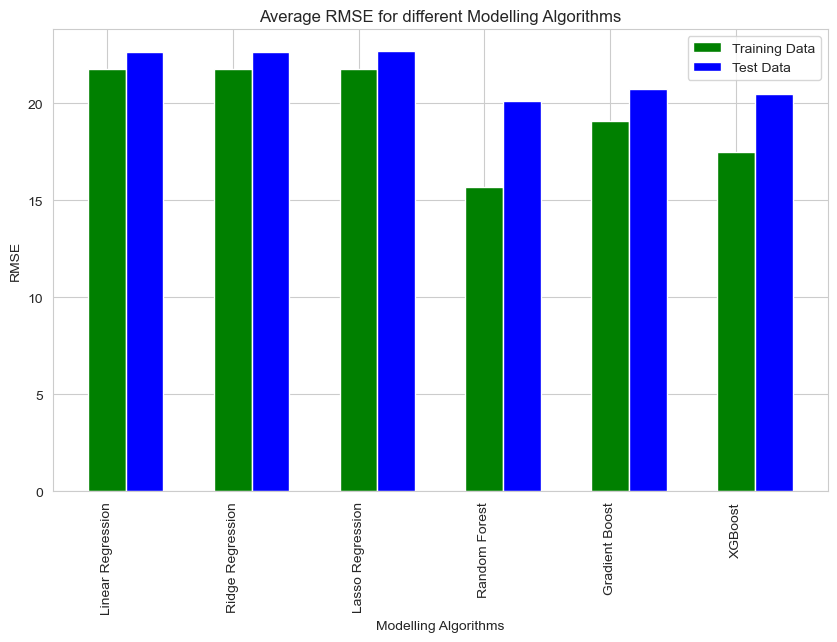

In [345]:
fig=plt.figure(figsize=(10, 6))
axes=fig.add_subplot(1, 1, 1)
bar_width = 0.3
idx = np.array(range(algo_score.shape[0]))
labels = algo_score.index
plt.bar(data=algo_score, height='Train RMSE', x=idx, color='g', width=bar_width, label='Training Data')
plt.bar(data=algo_score, height='Test RMSE', x=idx+bar_width, color='b', width=bar_width, label='Test Data')
plt.xticks(idx, labels, rotation=90)
plt.xlabel('Modelling Algorithms')
plt.ylabel('RMSE')
plt.title('Average RMSE for different Modelling Algorithms')
plt.legend()
plt.show()

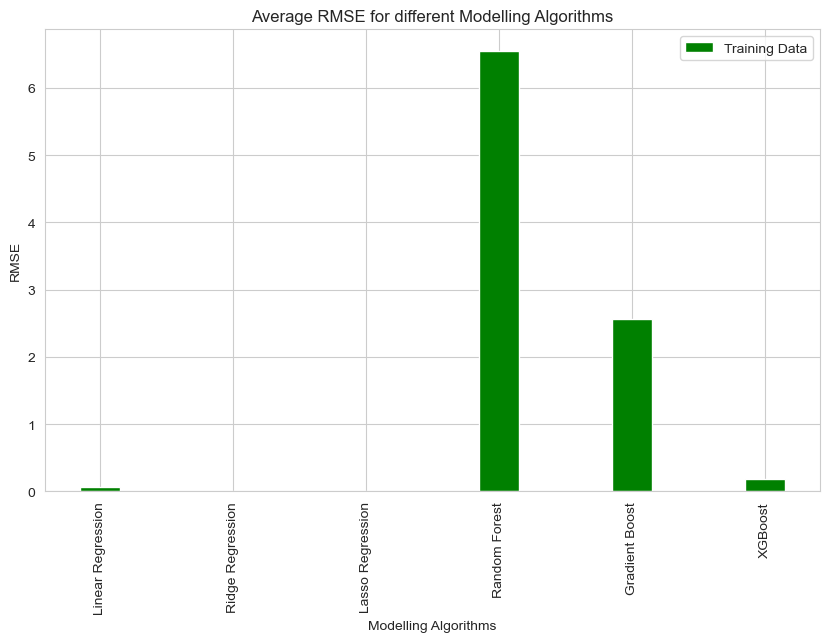

In [346]:
fig=plt.figure(figsize=(10, 6))
axes=fig.add_subplot(1, 1, 1)
bar_width = 0.3
idx = np.array(range(algo_score.shape[0]))
labels = algo_score.index
plt.bar(data=algo_score, height='Training+Test Time(sec)', x=idx, color='g', width=bar_width, label='Training Data')
plt.xticks(idx, labels, rotation=90)
plt.xlabel('Modelling Algorithms')
plt.ylabel('RMSE')#
plt.title('Average RMSE for different Modelling Algorithms')
plt.legend()
plt.show()